In [1]:
import pandas as pandaboi
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
DIRECTORY_PATH = '/Users/S/Downloads'
FILE_NAME = "Student Mental health.csv"

# Pre-processing
- Visualising the dataset
- Renaming variables
- Removing blank spaces

In [3]:
# Load data
df = pandaboi.read_csv(f'{DIRECTORY_PATH}/{FILE_NAME}')

In [4]:
# Visualise dataset
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [5]:
# Check data type
df.dtypes 

Timestamp                                        object
Choose your gender                               object
Age                                             float64
What is your course?                             object
Your current year of Study                       object
What is your CGPA?                               object
Marital status                                   object
Do you have Depression?                          object
Do you have Anxiety?                             object
Do you have Panic attack?                        object
Did you seek any specialist for a treatment?     object
dtype: object

In [6]:
# Rename variables in the dataset
df.rename(columns={
    'Choose your gender':'Gender', 
    'What is your course?':'Course',
    'Your current year of Study':'Current year',
    'What is your CGPA?':'CGPA', 
    'Do you have Depression?':'Depression', 
    'Do you have Anxiety?':'Anxiety',
    'Do you have Panic attack?':'Panic attacks',
    'Did you seek any specialist for a treatment?':'Seek specialist'
    }, inplace=True)

In [7]:
# Show dataset with new variable names
df.head()

,Timestamp,Gender,Age,Course,Current year,CGPA,Marital status,Depression,Anxiety,Panic attacks,Seek specialist
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [8]:
# Show categories within the CGPA variable
df["CGPA"].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [9]:
# Remove blank spaces
df['CGPA'] = df['CGPA'].str.strip()
df.head()

,Timestamp,Gender,Age,Course,Current year,CGPA,Marital status,Depression,Anxiety,Panic attacks,Seek specialist
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [10]:
## Explore missing values per each column and express their counts as percentages
(df.isna().sum()) / (len(df) * 100)

Timestamp          0.000000
Gender             0.000000
Age                0.000099
Course             0.000000
Current year       0.000000
CGPA               0.000000
Marital status     0.000000
Depression         0.000000
Anxiety            0.000000
Panic attacks      0.000000
Seek specialist    0.000000
dtype: float64

# Exploratory data analysis
- Descriptives of the population
- Distribution of numeric variables (visualised)
- Counting and visualising the number of students in the category CGPA
- Counting and visualising the number of students in the category CGPA stratified by current year of study

In [11]:
# Descriptive statistics
round(df.describe(), 2)

,Age
count,100.00
mean,20.53
std,2.50
min,18.00
25%,18.00
50%,19.00
75%,23.00
max,24.00


array([<Axes: title={'center': 'Age'}, xlabel='Age', ylabel='Count'>],
      dtype=object)

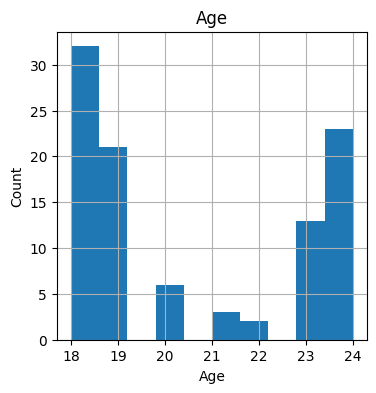

In [12]:
# Distribution histograms 
fig, ax = plt.subplots(figsize = (4, 4), dpi = 100)
plt.xlabel('Age')
plt.ylabel('Count')
df.hist(ax = ax)

In [13]:
# Check count
count = df['CGPA'].value_counts()
count.head()

3.50 - 4.00    48
3.00 - 3.49    43
2.50 - 2.99     4
0 - 1.99        4
2.00 - 2.49     2
Name: CGPA, dtype: int64

In [14]:
# Update order of CGPA
category_order = ['0 - 1.99', '2.00 - 2.49', '2.50 - 2.99', '3.00 - 3.49', '3.50 - 4.00']
df['CGPA'] = pandaboi.Categorical(df['CGPA'], categories=category_order, ordered=True)

Text(0, 0.5, 'Count')

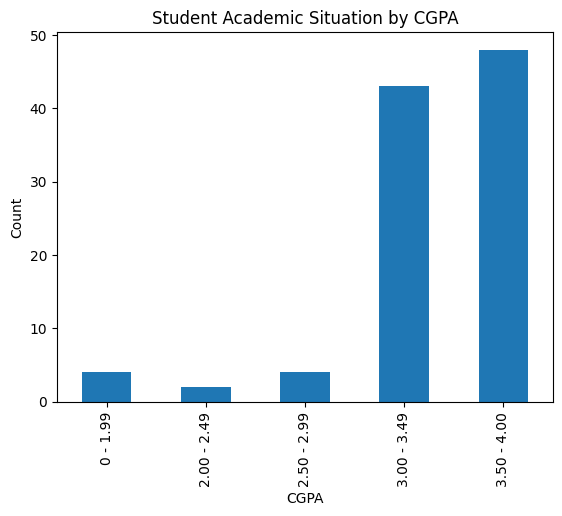

In [15]:
# Visualise CGPA plot

df["CGPA"].value_counts().sort_index().plot(kind="bar")

# set chart title and axis labels
plt.title('Student Academic Situation by CGPA')
plt.xlabel('CGPA')
plt.ylabel('Count')


In [16]:
# Capitalise Y in year

pandaboi.DataFrame({'Current year': ['year 1', 'year 2', 'year 3', 'year 4']})
df = df.replace({'Current year': {'year 1':'Year 1', 'year 2':'Year 2', 'year 3':'Year 3','year 4':'Year 4'}})

In [17]:
# Check 'Year' has been updated  
df['Current year'].unique()

array(['Year 1', 'Year 2', 'Year 3', 'Year 4'], dtype=object)

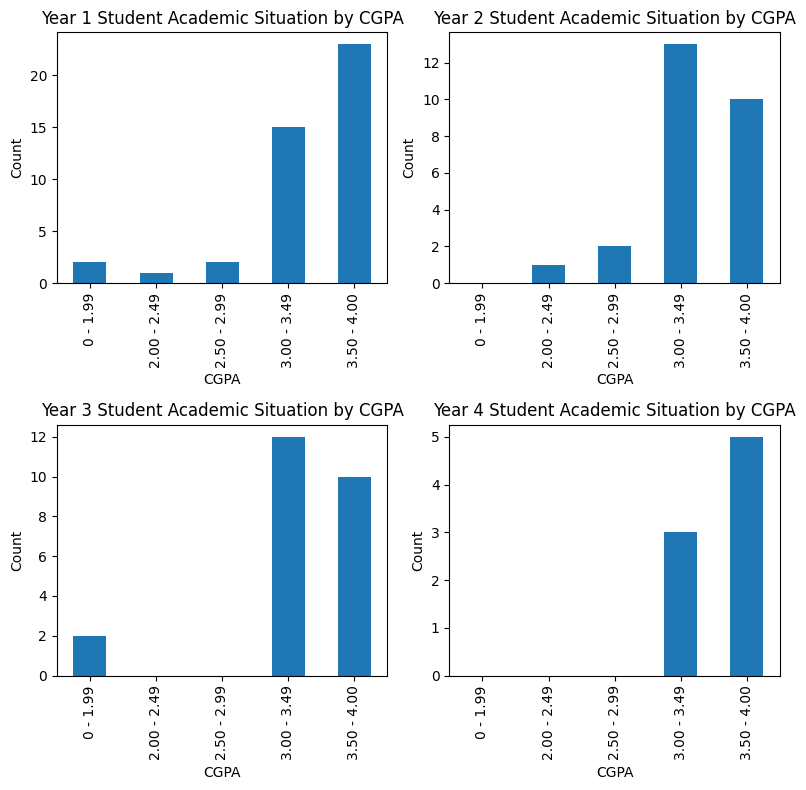

In [18]:
# Filter the DataFrame by the "year" column and count the GPA by frequency for each year
year_counts = df.groupby('Current year')['CGPA'].value_counts().sort_index()

# Create a 4-subplot bar graph of the GPA counts by year
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
axes = axes.flatten()
for i, year in enumerate(year_counts.index.levels[0]):
    gpa_counts = year_counts[year]
    gpa_counts.plot.bar(ax=axes[i])
    axes[i].set_title(f'{year} Student Academic Situation by CGPA')
    axes[i].set_xlabel('CGPA')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

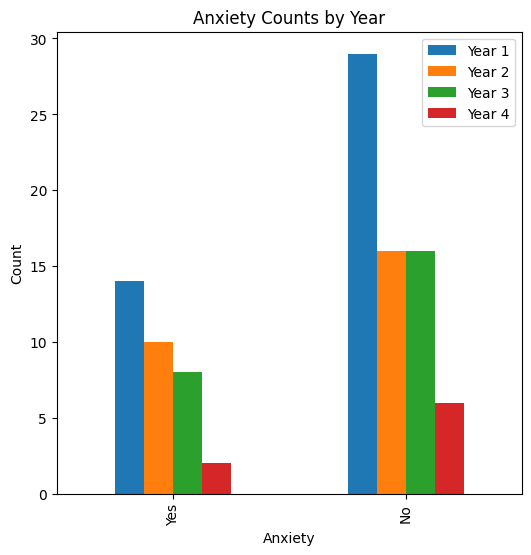

In [19]:
# Group the DataFrame by "Anxiety" and "year" and count the frequency of each combination
anxiety_counts = df.groupby(['Anxiety', 'Current year']).size().unstack()

# Swap the order of the "Yes" and "No" columns
anxiety_counts = anxiety_counts[['Year 1', 'Year 2', 'Year 3', 'Year 4']][::-1]

# Create a bar graph of the anxiety counts by year with "yes" on the left and "no" on the right
ax = anxiety_counts.plot.bar(figsize=(6, 6), width=0.5)
ax.set_title('Anxiety Counts by Year')
ax.set_xlabel('Anxiety')
ax.set_ylabel('Count')
ax.legend(['Year 1', 'Year 2', 'Year 3', 'Year 4'], loc='upper right')
plt.show()

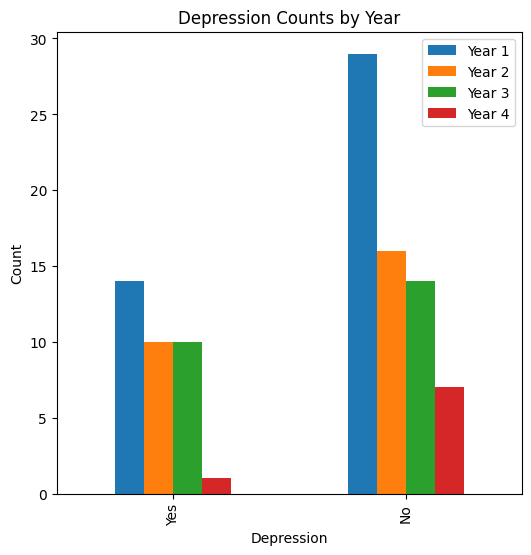

In [20]:
# Group the DataFrame by "Anxiety" and "year" and count the frequency of each combination
Depression_counts = df.groupby(['Depression', 'Current year']).size().unstack()

# Swap the order of the "Yes" and "No" columns
anxiety_counts = Depression_counts[['Year 1', 'Year 2', 'Year 3', 'Year 4']][::-1]

# Create a bar graph of the anxiety counts by year with "yes" on the left and "no" on the right
ax = anxiety_counts.plot.bar(figsize=(6, 6), width=0.5)
ax.set_title('Depression Counts by Year')
ax.set_xlabel('Depression')
ax.set_ylabel('Count')
ax.legend(['Year 1', 'Year 2', 'Year 3', 'Year 4'], loc='upper right')
plt.show()

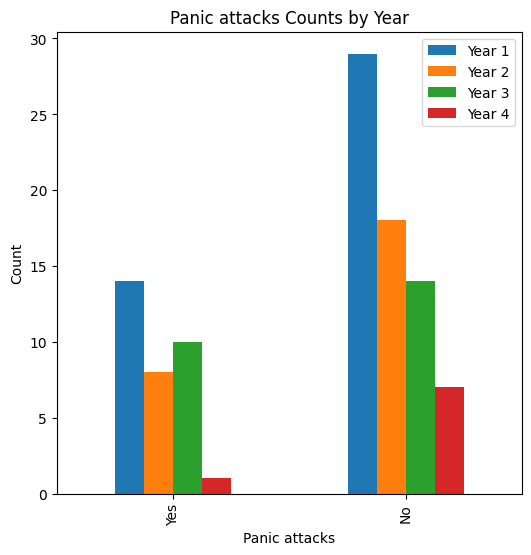

In [21]:
# Group the DataFrame by "Anxiety" and "year" and count the frequency of each combination
Panic_counts = df.groupby(['Panic attacks', 'Current year']).size().unstack()

# Swap the order of the "Yes" and "No" columns
Panic_counts = Panic_counts[['Year 1', 'Year 2', 'Year 3', 'Year 4']][::-1]

# Create a bar graph of the anxiety counts by year with "yes" on the left and "no" on the right
ax = Panic_counts.plot.bar(figsize=(6, 6), width=0.5)
ax.set_title('Panic attacks Counts by Year')
ax.set_xlabel('Panic attacks')
ax.set_ylabel('Count')
ax.legend(['Year 1', 'Year 2', 'Year 3', 'Year 4'], loc='upper right')
plt.show()

# Analysis

In [24]:
# Create a contingency table of year and anxiety
from scipy.stats import chi2_contingency

# Create a contingency table of year and anxiety
contingency_table = pandaboi.crosstab(df['Current year'], df['Anxiety'])

# Perform chi-squared test of independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the contingency table, chi-squared statistic, degrees of freedom, and p-value
print('Contingency Table:')
print(contingency_table)

print('Chi-Squared Statistic:', chi2_stat)
print('Degrees of Freedom:', dof)
print('P-Value:', p_value)
print('Expected Frequencies:')
print(expected)


Contingency Table:
Anxiety       No  Yes
Current year         
Year 1        29   14
Year 2        16   10
Year 3        16    8
Year 4         6    2
Chi-Squared Statistic: 0.5616169651584232
Degrees of Freedom: 3
P-Value: 0.9051602548389778
Expected Frequencies:
[[28.52475248 14.47524752]
 [17.24752475  8.75247525]
 [15.92079208  8.07920792]
 [ 5.30693069  2.69306931]]


In [25]:
# Create a contingency table of year and anxiety
from scipy.stats import chi2_contingency

# Create a contingency table of year and anxiety
contingency_table_depression = pandaboi.crosstab(df['Current year'], df['Depression'])

# Perform chi-squared test of independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table_depression)

# Print the contingency table, chi-squared statistic, degrees of freedom, and p-value
print('Contingency Table:')
print(contingency_table_depression)

print('Chi-Squared Statistic:', chi2_stat)
print('Degrees of Freedom:', dof)
print('P-Value:', p_value)
print('Expected Frequencies:')
print(expected)


Contingency Table:
Depression    No  Yes
Current year         
Year 1        29   14
Year 2        16   10
Year 3        14   10
Year 4         7    1
Chi-Squared Statistic: 2.504973353519865
Degrees of Freedom: 3
P-Value: 0.4743929574625697
Expected Frequencies:
[[28.0990099  14.9009901 ]
 [16.99009901  9.00990099]
 [15.68316832  8.31683168]
 [ 5.22772277  2.77227723]]


In [26]:
# Create a contingency table of year and anxiety
from scipy.stats import chi2_contingency

# Create a contingency table of year and anxiety
contingency_table_panic = pandaboi.crosstab(df['Current year'], df['Panic attacks'])

# Perform chi-squared test of independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table_panic)

# Print the contingency table, chi-squared statistic, degrees of freedom, and p-value
print('Contingency Table:')
print(contingency_table_panic)

print('Chi-Squared Statistic:', chi2_stat)
print('Degrees of Freedom:', dof)
print('P-Value:', p_value)
print('Expected Frequencies:')
print(expected)

Contingency Table:
Panic attacks  No  Yes
Current year          
Year 1         29   14
Year 2         18    8
Year 3         14   10
Year 4          7    1
Chi-Squared Statistic: 2.405537837865129
Degrees of Freedom: 3
P-Value: 0.4926045884686948
Expected Frequencies:
[[28.95049505 14.04950495]
 [17.5049505   8.4950495 ]
 [16.15841584  7.84158416]
 [ 5.38613861  2.61386139]]
